# Удовлетворенность пассажиров авиакомпании
## Описание задачи
Данный набор данных содержит опрос об <b>удовлетворенности авиапассажиров</b>. Поставлена следующая <b>задача классификации</b>:
Необходимо предсказать, к какому из <b>двух</b> уровней удовлетворенности авиакомпанией принадлежит пассажир:
<ol>
    <li><em>Удовлетворенность</em></li>
    <li><em>Нейтральность или неудовлетворенность</em></li>
</ol>

***

Ссылка на датасет: [Airline Passenger Satisfaction](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=train.csv)

***

## Чтение данных

In [1]:
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt  # Научная графика
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Загружаем данные

In [2]:
path = "../datasets/train.csv"
data = pd.read_csv(path)

Количество строк и столбцов:

In [3]:
data.shape

(103904, 25)

In [4]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Каждая строка соответсвует одному пассажиру.
Столбцы (признаки) - информация о пассажирах авиакомпании:

<ol>
    <li><b>Пол</b>: мужской или женский</li>
    <li><b>Тип пассажира</b>: постоянный или непостоянный клиент авиакомпании</li>
    <li><b>Возраст</b>: фактический возраст пассажира</li>
    <li><b>Тип путешествия</b>: цель полета поссажира (личное путешествие или деловое)</li>
    <li><b>Класс обслуживания</b>: бизнес, эконом, эконом плюс</li>
    <li><b>Расстояние полета</b></li>
    <li><b>Услуга Wi-Fi на борту</b>: уровень удовлетворенности услугой Wi-Fi на борту (0: без оценки; 1-5)</li>
    <li><b>Удобное время отправления/прибытия</b>: уровень удовлетворенности временем отправления/прибытия (0: без оценки; 1-5)</li>
    <li><b>Легкость онлайн-бронирования</b>: уровень удовлетворенности онлайн-бронированием (0: без оценки; 1-5)</li>
    <li><b>Расположение выхода</b>: уровень удовлетворенности местоположением выхода (0: без оценки; 1-5)</li>
    <li><b>Еда и напитки</b>: уровень удовлетворенности едой и напитками (0: без оценки; 1-5)</li>
    <li><b>Онлайн-посадка</b>: уровень удовлетворенности онлайн-посадкой (0: без оценки; 1-5)</li>
    <li><b>Комфортность пассажирского кресла</b>: уровень удовлетворенности креслом (0: без оценки; 1-5)</li>
    <li><b>Развлечения в полете</b>: уровень удовлетворенности развлечениями в полете (0: без оценки; 1-5)</li>
    <li><b>Бортовое обслуживание</b>: уровень удовлетворенности бортовым обслуживанием (0: без оценки; 1-5)</li>
    <li><b>Свободное пространство для ног</b>: уровень удовлетворенности свободным пространством для ног (0: без оценки; 1-5)</li>
    <li><b>Транспортировка багажа</b>: уровень удовлетворенности транспортировкой багажа (0: без оценки; 1-5)</li>
    <li><b>Служба регистрации</b>: уровень удовлетворенности службой регистрации (0: без оценки; 1-5)</li>
    <li><b>Обслуживание в полете</b>: уровень удовлетворенности обслуживанием в полете (0: без оценки; 1-5)</li>
    <li><b>Чистота</b>: уровень удовлетворенности чистотой (0: без оценки; 1-5)</li>
    <li><b>Задержка отправления в минутах</b>: задержка в минутах при отправлении</li>
    <li><b>Задержка прибытия в минутах</b>: задержка в минутах при прибытии</li>
</ol>


Посмотрим на первые и последние строки набора данных:

In [5]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


Целевой признак `satisfaction` более менее сбалансирован: 

In [7]:
data['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Посмотрим на данные более подробно:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Из информации видно:

<ol>
    <li><b>В столбце</b>, соответствующем признаку <b>Arrival Delay in Minutes, пропущено 310 значений</b>.</li>
    <li><b>Первые два признака являются бесполезными и не повлияют на классификацию</b>, поэтому от них стоит избавиться.</li>
    <li><b>Многие столбцы содержат категориальные значения</b>, но имеют тип 'object' или 'int64'. Заменим данный тип на специальный, предназначенный для хранения категориальных значений.</li>
</ol>

In [9]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [10]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

Теперь информация выглядит следующим образом:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

## Визуализация данных (c интепретацией) и вычисление основных характеристик

Для каждого количественного признака получим средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей:

In [12]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Теперь для каждого категориального признака получим общее количество значений, количество уникальных значений, наиболее часто встречающийся элемент и общее количество таких элементов:

In [13]:
data.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


Посмотрим на соотношение значений целевой переменной:

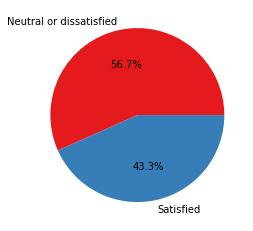

In [14]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Set1"), autopct = '%1.1f%%')
pass

Из круговой диграммы видно, что <b>выборка является более менее сбалансированной</b>.

Вычислим матрицу корреляции для количественных признаков и используем визуальный образ данной матрицы:

In [15]:
corr_mat = data.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


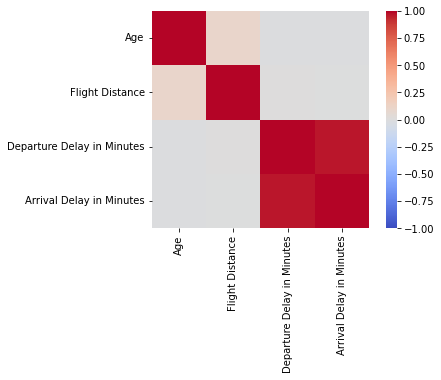

In [16]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

Можно заметить, что между признаками <em>`Задержка отправления в минутах`</em> и <em>`Задержка прибытия в минутах`</em> наблюдается большая корреляция. Величина коэффициента корреляции достигает следующего значения:

In [17]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965481
dtype: float64

Построим диаграмму рассеивания для данных признаков:

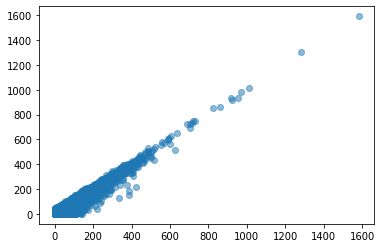

In [18]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.5)
pass

Из графика видно, что точки выстроились более-менее вдоль прямой, идущей из нижнего левого угла в правый верхний. Таким образом, в некотором приближении <b> наблюдается линейная звивисимость между этими признакми </b>.

Полученные результаты являются вполне логичными, и их можно объяснить следующим образом: если рейс клиентов авиакомпании при отправлении был задержан на некоторое количество времени, то примерно на такое же количество времени рейс задержится при посадке (при условии, что самолет в полете не будет увеличивать скорость для наверстывание упущенного времени).

Рассмотрим соотношение значений для каждого из категориальных признаков:

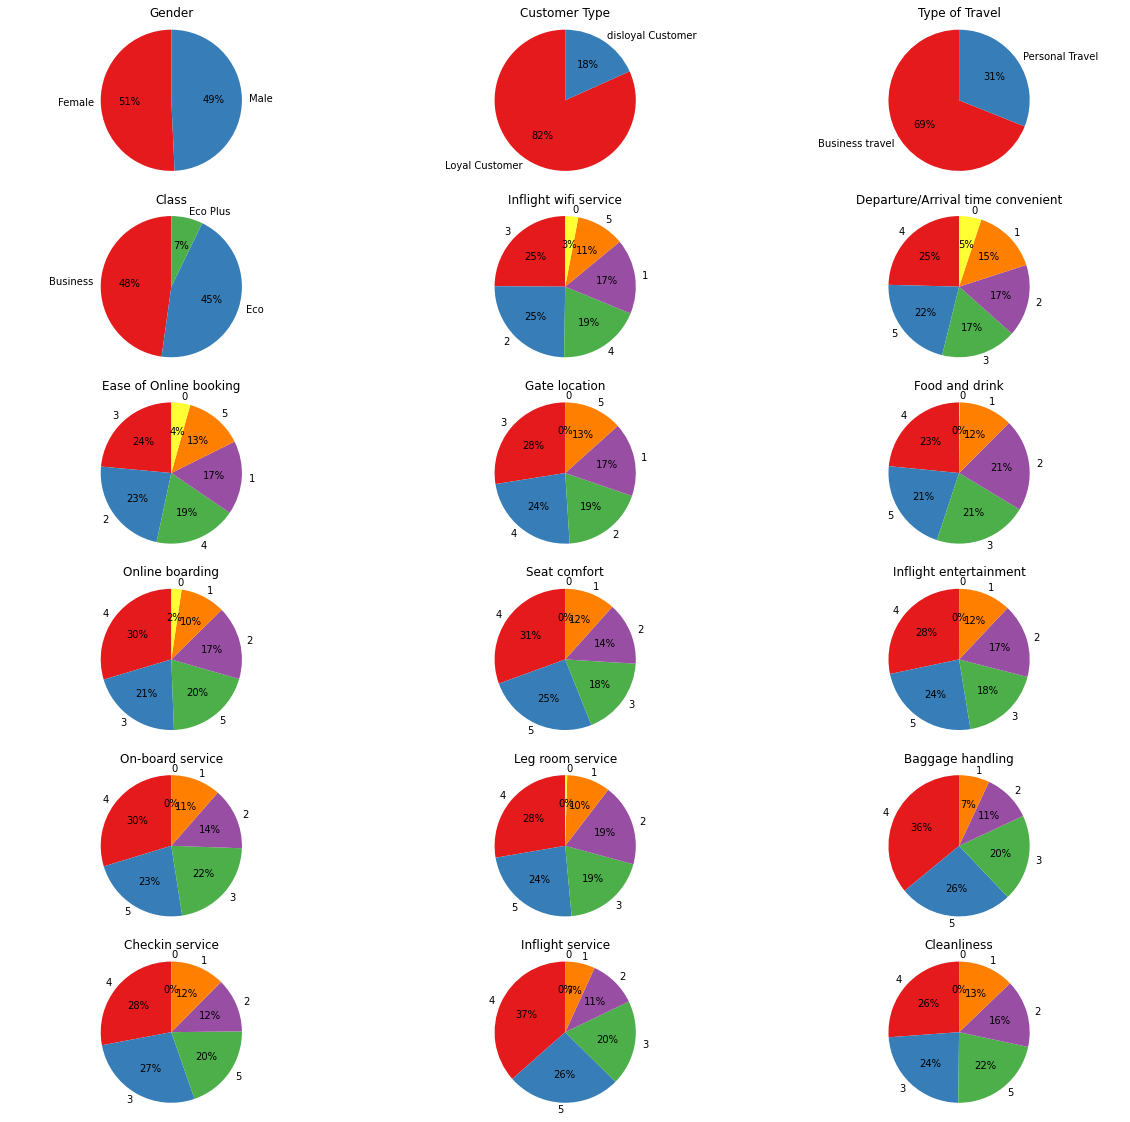

In [19]:
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("Set1"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Некоторые выводы об рассматриваемой выборке:
<ul>
    <li>Количество мужчин и женщин в данной выборке примерно одинаковое</li>
    <li>Значительное большинство клиентов авиакомпании являются постоянными</li>
    <li>Большая часть клиентов совершили перелет ради деловой встречи, а не по личным делам</li>
    <li>Примерно половина пассажиров находилась в бизнес-классе</li>
    <li>Более 60% пассажиров остались довольны сервисом по транспортировке багажа (поставили оценки 4-5 из 5)</li>
    <li>Более 50% пассажирам было удобно сидеть на их креслах (поставили оценки 4-5 из 5)</li>
</ul>

Теперь рассмотрим несколько "ящиков с усами" (бокс-диаграмм).

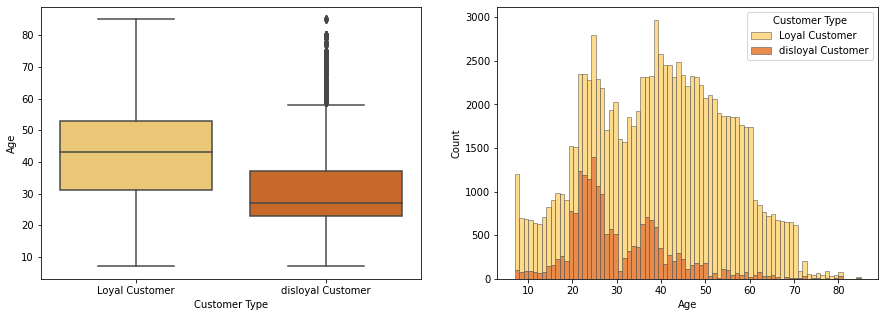

In [20]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

По данной бокс-диаграмме можно сделать вывод о том, что <b>большинство постоянных клиентов авиакомпании находятся в возрасте между 30 и 50 годами (в среднем их возраст немного больше 40 лет)</b>. Возрастной диапазон непостоянных клиентов немного меньше (от 25 до 40 лет, в среднем - немного меньше 30).

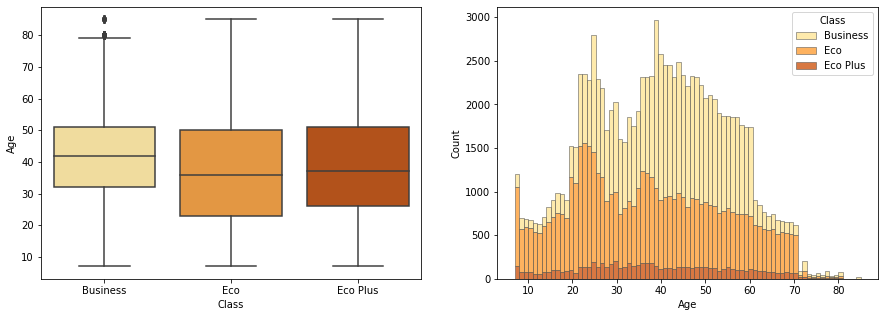

In [21]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Можно увидеть, что в среднем возрастной диапазон тех клиентов, которые путешествуют в бизнесс-классе, совпадает (в соответствии с предыдущей бокс-диаграммой) с возрастным диапазоном постоянных клиентов. На основании этого наблюдения можно предположить, что <b>постоянные клиенты в основном покупают себе бизнес-класс</b>.

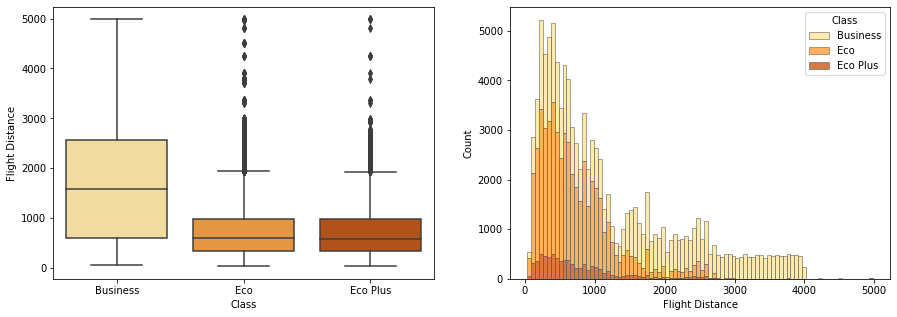

In [22]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

По данной бокс-диграмме можно сделать следующий вывод: <b>клиенты, расстояние полета которых является большим, в основном совершают перелет в бизнес-классе</b>.

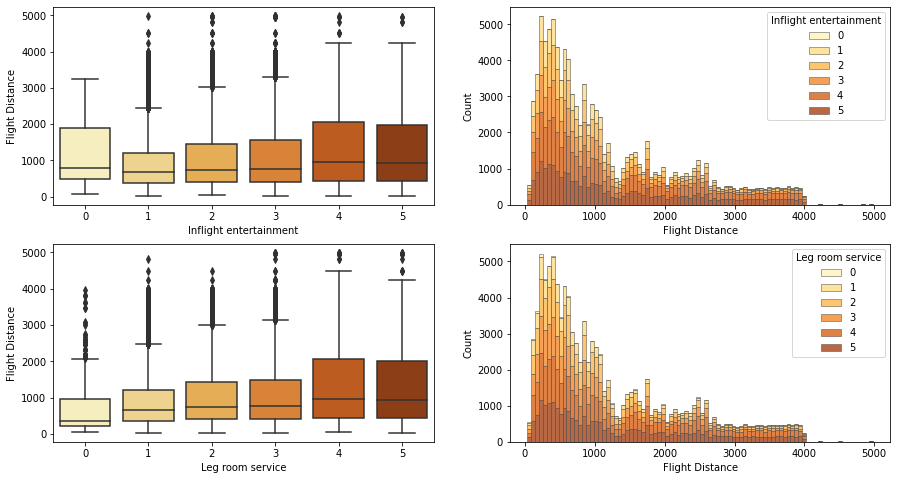

In [23]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0, 0])
sns.histplot(data, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[1, 0])
sns.histplot(data, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
pass

Можно заметить следующую закономерность: <b>чем большее расстояние пассажир самолета преодолевает (соответственно, дольше находится в полете), тем он больше доволен развлечениями в полете и дополнительным пространством для ног (в среднем)</b>.

Теперь рассмотрим графики зависимостей некоторых категориальных признаков от целевого - <em>удовлетворенности авиапассажиров</em>:

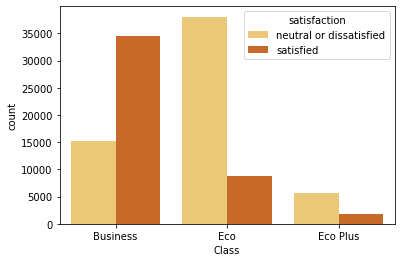

In [24]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

Из графика видно, что <b>большинство пассажиров, совершивших перелет в эконом плюс или эконом-классе, остались недовольны полетом, а пассажиры, летевшие в бизнес-классе, остались довольными</b>.

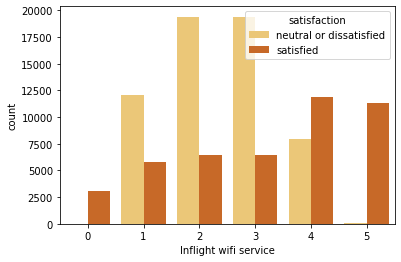

In [25]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

По данному графику можно заметить, что <b>практически все пассажиры, которые оценили wifi сервис на 5 из 5 баллов, остались довольны полетом</b>.

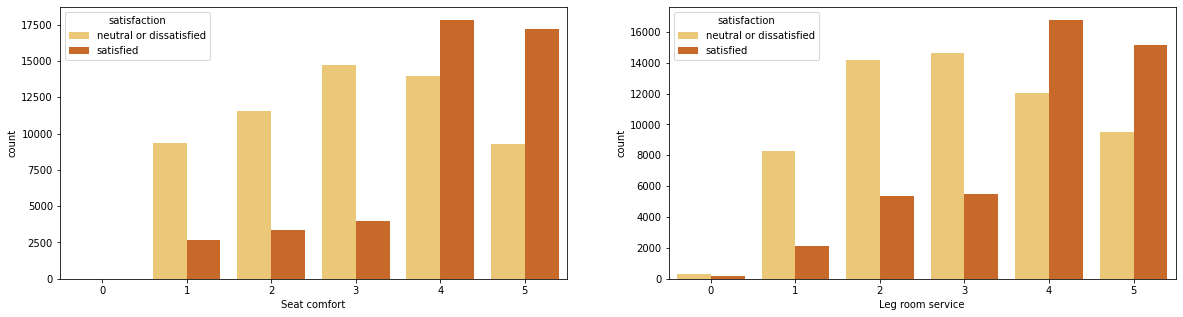

In [26]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "YlOrBr", data = data,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "YlOrBr", data = data, ax = ax[1])
plt.show()

По графикам выше можно сделать следующий вывод: <b>большинство пассажиров, которые оценили удобство кресел и дополнительное свободное место для ног на 4 и 5 баллов из 5, остались довольны полетом</b>.

## Заполнение пропущенных значений

Посмотрим, сколько пропущенных значений в каждом признаке:

In [27]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Заполним <b>медианами</b> пропущенные значения в столбцах, соответствующих количественным признакам:

In [28]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [29]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Из данной таблицы видно, что пропущенных значений больше нет.

In [30]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


## Обработка категориальных признаков

Разделим признаки на количественные и категориальные:

In [31]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

Разделим категориальные признаки на бинарные и небинарные:

In [32]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


Посмотрим на уникальные значения для каждого бинарного признака:

In [33]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in data[col].unique():
        if uniq == data[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : Loyal Customer, disloyal Customer.
Type of Travel : Personal Travel, Business travel.


Выполним бинаризацию:

In [34]:
for col in binary_columns:
    data[col] = data[col].cat.codes

Посмотрим теперь на небинарные категориальные признаки:

In [35]:
data[nonbinary_columns]

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1


К небинарными признакам применим следующий метод векторизации:

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Такую векторизацию осуществляет метод get_dummies:

In [36]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [37]:
len(data_nonbinary.columns)

86

## Нормализация количественных признаков

Имеем следующие количественные признаки:

In [38]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Выполним <b>стандартизацию</b> (<em>линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению</em>) всех количественных признаков:

In [39]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [40]:
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-2.549034e-17,8.000991e-17,1.853221e-17,1.463429e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01


## Формирование таблицы

Соединяем все преобразованные столбцы в одну таблицу:

In [41]:
target = data['satisfaction']
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(103904, 93)


Теперь она имеет следующий вид:

In [42]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Gender,Customer Type,Type of Travel
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,-2.549034e-17,8.000991e-17,1.853221e-17,1.463429e-17,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,...,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365,0.492541,0.182678,0.310373
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,...,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138,0.499947,0.386404,0.462649
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Разделение данных на обучающую и тестовую выборки

Получим <b>X</b> и <b>y</b>:

In [43]:
X = data
y = target
N, d = X.shape
N, d

(103904, 93)

In [44]:
X.columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and 

In [45]:
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

Разобьем данные на обучающую и тестовую выборки в пропорции 9:1 <b>(90% – обучающая выборка, 10% – тестовая)</b>:

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 777)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(93513, 10391)

## Метод k-ближайших соседей (kNN)

In [47]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Переберем количество соседей от 1 до 20 и определим оптимальное (с наименьшей ошибкой кросс-валидации) количество:

In [48]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print('Ошибка на кросс-валидации: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Ошибка на кросс-валидации:  0.06368096327560957
Оптимальное количество соседей:  12


Обучим и запустим kNN для оптимального среди рассмотренных количества соседей:

In [49]:
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.054334691433276655
Ошибка на тестовой выборке:  0.06592243287460302


## SVC

Обучим и запустим метод опорных векторов:

In [50]:
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.04966154438420327
Ошибка на тестовой выборке:  0.050235780964296026


## Random Forest

Обучим и запустим случайный лес:

In [51]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.03955345972476181


## Extremely Randomized Trees

Обучим и запустим экстремально случайный лес:

In [52]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.03859108844192089


## AdaBoost

Обучим и запустим алгоритм AdaBoost:

In [53]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0702576112412178
Ошибка на тестовой выборке:  0.07160042344336445


## GBT

Обучим и запустим градиентный бустинг деревьев решений:

In [54]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.055286430763637144
Ошибка на тестовой выборке:  0.056394957174477914


## Общие выводы
***
<b>Выводы о рассматриваемой выборке</b>:

> <ul>
>     <li>Выборка является более менее сбалансированной <em>(56.7% на 43.3%)</em>.</li>
>     <li>Количество мужчин и женщин в данной выборке примерно одинаковое.</li>
>     <li>Значительное большинство клиентов авиакомпании являются постоянными.</li>
>     <li>Большая часть клиентов совершили перелет ради деловой встречи, а не по личным делам.</li>
>     <li>Примерно половина пассажиров находилась в бизнес-классе.</li>
>     <li>Более 60% пассажиров остались довольны сервисом по транспортировке багажа (поставили оценки 4-5 из 5).</li>
>     <li>Более 50% пассажирам было удобно сидеть на их креслах (поставили оценки 4-5 из 5).</li>
>     <li>Была замечена большая корреляция <em>(96%)</em> между признаками 'Задержка отправления в минутах' и 'Задержка прибытия в минутах' (что является вполне логичным и было подробно рассмотрено выше).</li>
>     <li>Большинство постоянных клиентов авиакомпании находятся в возрасте между 30 и 50 годами (в среднем их возраст немного больше 40 лет). Возрастной диапазон непостоянных клиентов немного меньше (от 25 до 40 лет, в среднем - немного меньше 30).</li>
>     <li>Клиенты, расстояние полета которых является большим, в основном совершают перелет в бизнес-классе.</li>
>     <li>Чем большее расстояние пассажир самолета преодолевает (соответственно, дольше находится в полете), тем он больше доволен развлечениями в полете и дополнительным пространством для ног (в среднем).</li>
>     <li>Большинство пассажиров, совершивших перелет в эконом плюс или эконом-классе, остались недовольны полетом, а те, кому посчастливилось совершить полет в бизнес-классе, довольны.</li>
>     <li>Практически все пассажиры, которые оценили wifi сервис на 5 из 5 баллов, остались довольны полетом.</li>
>     <li>Большинство пассажиров, которые оценили удобство кресел и дополнительное свободное место для ног на 4 и 5 баллов из 5, остались довольны полетом.
> </ul>

***
<b>Выводы о результатах классификации</b>:

> <ul>
>     <li>Для оптимального (с наименьшей ошибкой кросс-валидации) количества соседей было получено, что метод kNN ошибся на обучающей выборке в <em>5.5%</em> случаев, а на тестовой - в <em>6.6%</em> при обучении на 93.5 тыс. данных и тестировании на 10 тыс.</li>
>     <li>Для метода опорных векторов ошибка как на обучающей, так и на тестовой выборке составила <em>5%</em>.</li>
>     <li>Для классификаторов случайный лес и экстремально случайный лес ошибка на обучащей выборке не наблюдалась, а на тестовой составила <em>4%</em>.</li>
>     <li>Для алгоритма AdaBoost ошибка на обучающей выборке составила <em>7%</em>, а на тестовой – <em>7.2%</em>.</li>
>     <li>Для градиентного бустинга деревьев решений ошибка на обучающей и тестовой выборках составила <em>5.5% и 5.6%</em> соответственно.</li>
>     <li>Лучший результат показали классификаторы случайный и экстремально случайный лес (ошибка на тестовой выборке <em>4%).</em></li>
</ul>

***

## Нейронная сеть

In [55]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### Разделение данных на обучающу и тестовую выборку

Общее количество данных:

In [56]:
N, d

(103904, 93)

Возьмем только часть данных, потому что обучение нейронной сети требует много времени

In [57]:
N_train = 25000
N_test = 3000

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = N_train, test_size = N_test, 
                                                    stratify = y, random_state = 2)

X_train.shape, X_test.shape 

((25000, 93), (3000, 93))

### Подбор гиперпараметров

Подбирать гиперпарраметры будет двумя способами:

**Первый способ**:
1. Подбор параметра `alpha` для одного скрытого слоя из 50 нейронов (`alpha_local_opt`)
2. Подбор количества нейронов для одного скрытого слоя при `alpha_local_opt` (`hidden_layer_local_opt_1`)
3. Обучение нейронной сети при `alpha_local_opt` и количестве нейронов одного скрытого слоя, равного `hidden_layer_local_opt_1`
4. Подбор количества нейронов для второго скрытого слоя, при количестве нейронов первого скрытого слоя, равного  `hidden_layer_local_opt_1`, и параметра `alpha = alpha_local_opt`
5. Обучение нейронной сети при `alpha_local_opt` и количестве нейронов первого скрытого слоя, равного `hidden_layer_local_opt_1` и количестве нейронов второго скрытого слоя, равного `hidden_layer_local_opt_2`

**Второй способ**:
Во втором способе будем одновременно перебирать гиперпараметры в некоторой окресностях, полученных ранее. 
Перебираемы гиперпараметры:
* `alhpa`;
* Количество нейронов первого скрытого слоя;
* Количество нейронов второго скрытого слоя.

### Первый способ перебор гиперпараметров

#### Подбор оптимального параметра регуляризации `alpha` (для 1 скрытого слоя из 50 нейронов)

In [58]:
%%time
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, 
                              hidden_layer_sizes = 50,
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: total: 24min 33s
Wall time: 4min 33s


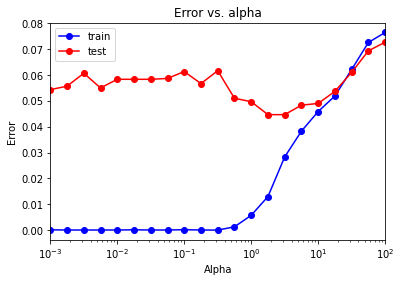

In [59]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

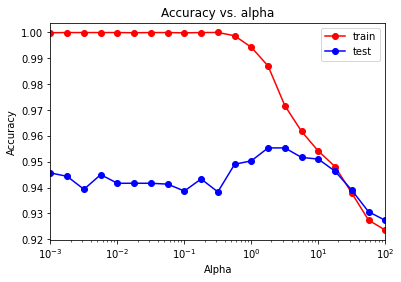

In [60]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
pass

In [61]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  4e-05
Минимальная ошибка на тестовой выборке:  0.04466666666666667


In [62]:
alpha_local_opt = alpha_arr[test_err == min_test_err][0]
print('Оптимальное значение alpha: ', alpha_local_opt)

Оптимальное значение alpha:  1.7782794100389228


#### Обучение классификатора при значении `alpha_local_opt` (для 1 скрытого слоя из 50 нейронов)

In [63]:
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = 50,
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)
pass

CPU times: total: 2min 12s
Wall time: 23.2 s


In [64]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.013
Ошибка на тестовой выборке:  0.04466666666666667


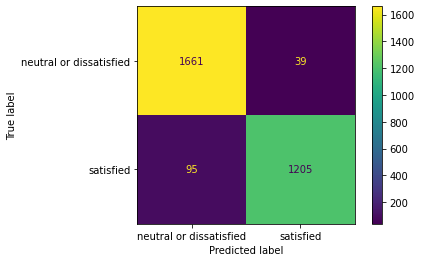

In [65]:
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

#### Подбор `hidden_layer_local_opt_1` для `alpha_local_opt` (для 1 скрытого слоя из 50 нейронов)

In [66]:
%%time
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                              hidden_layer_sizes = size,
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: total: 1h 39s
Wall time: 11min 22s


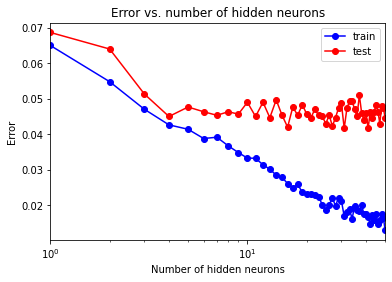

In [67]:
plt.semilogx(hidden_layer, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Error')
plt.legend()
pass

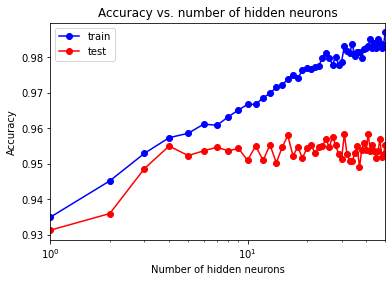

In [68]:
plt.semilogx(hidden_layer, train_acc, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Accuracy')
plt.legend()
pass

In [69]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.013
Минимальная ошибка на тестовой выборке:  0.041666666666666664


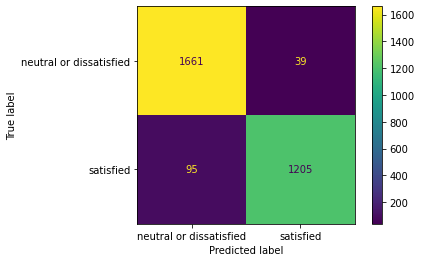

In [70]:
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

In [71]:
hidden_layer_local_opt_1 = hidden_layer[test_err == min_test_err][0]
print('Оптимальное значение количества нейронов скрытого слоя: ', hidden_layer_local_opt_1)

Оптимальное значение количества нейронов скрытого слоя:  31


#### Обучение нейронной сети `alpha_local_opt` (для 1 скрытого слоя из 50 нейронов) и `hidden_layer_local_opt_1`

In [72]:
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = hidden_layer_local_opt_1,
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

CPU times: total: 1min 53s
Wall time: 23.2 s


MLPClassifier(activation='logistic', alpha=1.7782794100389228,
              hidden_layer_sizes=31, max_iter=1000, random_state=42,
              solver='lbfgs')

In [73]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.01688
Ошибка на тестовой выборке:  0.041666666666666664


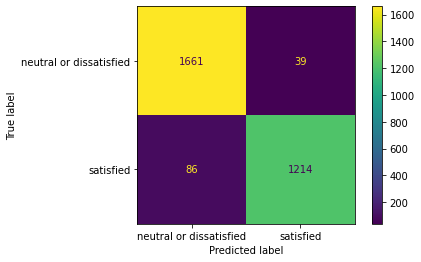

In [74]:
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

#### Подбор `hidden_layer_local_opt_2` при `alpha_local_opt` (для 1 скрытого слоя из 50 нейронов) и `hidden_layer_local_opt_1`

In [76]:
%%time
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                              hidden_layer_sizes = (hidden_layer_local_opt_1, size),
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: total: 5h 5min 44s
Wall time: 54min 25s


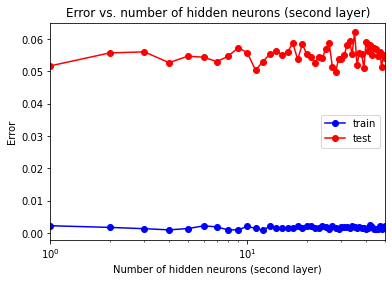

In [77]:
plt.semilogx(hidden_layer, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Error')
plt.legend()
pass

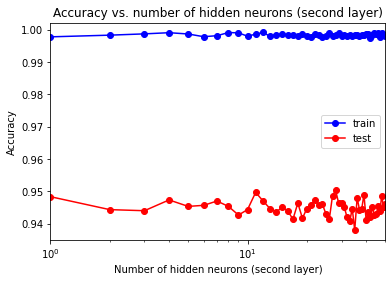

In [78]:
plt.semilogx(hidden_layer, train_acc, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Accuracy')
plt.legend()
pass

In [79]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.00088
Минимальная ошибка на тестовой выборке:  0.049666666666666665


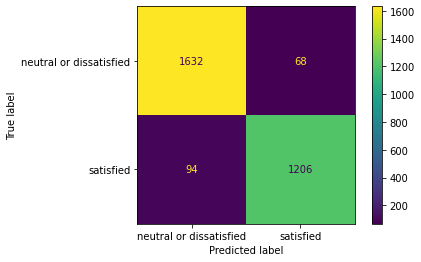

In [80]:
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

In [81]:
hidden_layer_local_opt_2 = hidden_layer[test_err == min_test_err][0]
print('Оптимальное значение количества нейронов второго скрытого слоя: ', hidden_layer_local_opt_2)

Оптимальное значение количества нейронов второго скрытого слоя:  28


#### Обучение нейронной сети при `alpha_local_opt` (для 1 скрытого слоя из 50 нейронов), `hidden_layer_local_opt_1` и `hidden_layer_local_opt_2`

In [82]:
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = (hidden_layer_local_opt_1, hidden_layer_local_opt_2),
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

CPU times: total: 8min 10s
Wall time: 1min 38s


MLPClassifier(activation='logistic', alpha=1.7782794100389228,
              hidden_layer_sizes=(31, 28), max_iter=1000, random_state=42,
              solver='lbfgs')

In [83]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.00156
Ошибка на тестовой выборке:  0.049666666666666665


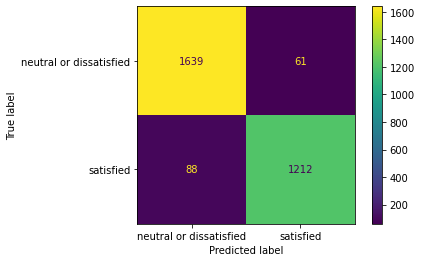

In [84]:
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_)
disp.plot()
plt.show()

### Второй способ подбора гиперпараметров

####  Одновременный перебор alpha и количества нейронов скрытого слоя (для нейронной сети с одним скрытым слоем)

In [85]:
%%time
hidden_layer = np.arange(hidden_layer_local_opt_1 - 2, hidden_layer_local_opt_1 + 2)
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

opt_params = []

for size in hidden_layer:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, 
                                  hidden_layer_sizes = size,
                                  solver = 'lbfgs', 
                                  max_iter = 1000, 
                                  activation = 'logistic',
                                  random_state = 42)


        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)

        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))
        train_acc.append(accuracy_score(y_train, y_train_pred))
        test_acc.append(accuracy_score(y_test, y_test_pred))
        
        params = {'alpha': alpha, 'hidden_layer': size} 
        opt_params.append(params)

CPU times: total: 1h 44min 45s
Wall time: 20min 28s


In [86]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  8e-05
Минимальная ошибка на тестовой выборке:  0.041666666666666664


In [87]:
index_opt = 0
for index in range(len(test_err)):
    if test_err[index] == min_test_err:
        index_opt = index
        break
        
hidden_layer_opt = opt_params[index_opt]['hidden_layer']
print('Оптимальное значение количества нейронов скрытого слоя: ', hidden_layer_opt)

alpha_opt = opt_params[index_opt]['alpha']
print('Оптимальное значение alpha: ', alpha_opt)

Оптимальное значение количества нейронов скрытого слоя:  31
Оптимальное значение alpha:  1.7782794100389228


####  Одновременный перебор alpha, количества нейронов первого и второго скрытых слоев

In [88]:
%%time
hidden_layer_first = np.arange(hidden_layer_local_opt_1 - 2, hidden_layer_local_opt_1 + 2)
hidden_layer_second = np.arange(hidden_layer_local_opt_2 - 2, hidden_layer_local_opt_2 + 2)
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

opt_params = []

for size_first in hidden_layer_first:
    for size_second in hidden_layer_second:
        for alpha in alpha_arr:
            mlp_model = MLPClassifier(alpha = alpha, 
                                      hidden_layer_sizes = (size_first, size_second), 
                                      solver = 'lbfgs', 
                                      max_iter = 1000, 
                                      activation = 'logistic',
                                      random_state = 42)


            mlp_model.fit(X_train, y_train)

            y_train_pred = mlp_model.predict(X_train)
            y_test_pred = mlp_model.predict(X_test)

            train_err.append(np.mean(y_train != y_train_pred))
            test_err.append(np.mean(y_test != y_test_pred))
            train_acc.append(accuracy_score(y_train, y_train_pred))
            test_acc.append(accuracy_score(y_test, y_test_pred))
            
            params = {'alpha': alpha, 'hidden_layer_first': size_first, 'hidden_layer_second': size_second} 
            opt_params.append(params)

CPU times: total: 22h 29min 47s
Wall time: 5h 3min 2s


In [89]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.0
Минимальная ошибка на тестовой выборке:  0.043333333333333335


In [90]:
index_opt = 0
for index in range(len(test_err)):
    if test_err[index] == min_test_err:
        index_opt = index
        break
        
hidden_layer_opt_1 = opt_params[index_opt]['hidden_layer_first']
print('Оптимальное значение количества нейронов первого скрытого слоя: ', hidden_layer_opt_1)

hidden_layer_opt_2 = opt_params[index_opt]['hidden_layer_second']
print('Оптимальное значение количества нейронов второго скрытого слоя: ', hidden_layer_opt_2)

alpha_opt = opt_params[index_opt]['alpha']
print('Оптимальное значение alpha: ', alpha_opt)

Оптимальное значение количества нейронов первого скрытого слоя:  31
Оптимальное значение количества нейронов второго скрытого слоя:  29
Оптимальное значение alpha:  5.623413251903491


## Общие выводы
***
> <ul>
>     <li>Наименьшая ошибка на тестовой выборке составила <em>(4.3%)</em> (лучше, чем при других классификаторов).</li>
>     <li>Наименьшая ошибка была достигнута при параметре <b>alpha ≈ 5.623, `hidden_layer_first` = 31, `hidden_layer_second` = 29 </b> </li>
>     <li>Не смотря, на то, что обучение проводилось не на всей выборке, были получены хорошие результаты.</li>
>     <li>Поскольку обучение нейронных сетей зависит от количества входных данных, то при увеличении обучающей выборке может быть получены результат, лучший предыдущего.</li>
>     <li>Перебор гиперпараметров осуществлялся в узком диапазоне, поэтому при его увеличении может быть достигнуа меньшая ошибка.</li>
> </ul>
***